# Problem Set 3

### Question 1 
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address. <br>
Step 3. Assign it to a variable called users <br>
Step 4. Discover what is the mean age per occupation <br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least <br>
Step 6. For each occupation, calculate the minimum and maximum ages <br>
Step 7. For each combination of occupation and sex, calculate the mean age <br>
Step 8. For each occupation present the percentage of women and men <br>

In [18]:
import pandas as pd
from tabulate import tabulate

# Import the dataset from the provided address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

# Step 4: Discover what is the mean age per occupation
mean_age = users.groupby('occupation')['age'].mean()
print("Mean Age Per Occupation:\n", mean_age)
print("-" * 50)
# print(tabulate(mean_age.reset_index(), headers=['Occupation', 'Mean Age'], tablefmt='grid'), "\n")


# Step 5: Discover the Male ratio per occupation and sort it from most to least
male_ratio = (users[users['gender'] == 'M']
              .groupby('occupation')['gender']
              .count() / users.groupby('occupation')['gender'].count()).sort_values(ascending=False)
print("\nMale Ratio Per Occupation:\n", male_ratio)
print("-" * 50)
# print(tabulate(male_ratio.reset_index(), headers=['Occupation', 'Male Ratio'], tablefmt='grid'), "\n")

# Step 6: For each occupation, calculate the minimum and maximum ages
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMin/Max Age Per Occupation:\n", min_max_age)
print("-" * 50)

# Step 7: For each combination of occupation and gender, calculate the mean age
mean_age_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean Age Per Occupation and Gender:\n", mean_age_sex)
print("-" * 50)

# Step 8: For each occupation, present the percentage of women and men
gender_percentage = (users.groupby(['occupation', 'gender'])
                     .size().unstack(fill_value=0))
gender_percentage = gender_percentage.div(gender_percentage.sum(axis=1), axis=0) * 100
print("\nGender Percentage Per Occupation:\n", gender_percentage)

Mean Age Per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
--------------------------------------------------

Male Ratio Per Occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.

### Question 2
Euro Teams
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address <br>
Step 3. Assign it to a variable called euro12 <br>
Step 4. Select only the Goal column <br>
Step 5. How many team participated in the Euro2012? <br>
Step 6. What is the number of columns in the dataset? <br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline 
Step 8. Sort the teams by Red Cards, then to Yellow Cards <br>
Step 9. Calculate the mean Yellow Cards given per Team <br>
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start <br>
with G
Step 12. Select the first 7 columns <br>
Step 13. Select all columns except the last 3 <br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia <br>

In [17]:
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals = euro12['Goals']
print("Goals Column:\n", goals)
print("-" * 50)

# Step 5: Number of teams that participated
num_teams = euro12['Team'].nunique()
print("\nNumber of Teams Participated:", num_teams)
print("-" * 50)

# Step 6: Number of columns in the dataset
num_columns = euro12.shape[1]
print("\nNumber of Columns:", num_columns)
print("-" * 50)

# Step 7: View columns Team, Yellow Cards, and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline Dataframe:\n", discipline)
print("-" * 50)

# Step 8: Sort the teams by Red Cards, then Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("\nSorted Discipline:\n", discipline_sorted)
print("-" * 50)

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards Per Team:", mean_yellow_cards)
print("-" * 50)

# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nTeams Scoring >6 Goals:\n", teams_more_than_6_goals[['Team', 'Goals']])
print("-" * 50)

# Step 11: Select teams starting with G
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams Starting with 'G':\n", teams_start_with_G[['Team']])
print("-" * 50)

# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 Columns:\n", first_7_columns)
print("-" * 50)

# Step 13: Select all columns except the last 3
all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll Columns Except Last 3:\n", all_except_last_3)
print("-" * 50)

# Step 14: Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy (England, Italy, Russia):\n", shooting_accuracy)

Goals Column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
--------------------------------------------------

Number of Teams Participated: 16
--------------------------------------------------

Number of Columns: 35
--------------------------------------------------

Discipline Dataframe:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12     

### Question 3
Housing
Step 1. Import the necessary libraries <br>
Step 2. Create 3 differents Series, each of length 100, as follows: <br>
• The first a random number from 1 to 4 <br>
• The second a random number from 1 to 3 <br>
• The third a random number from 10,000 to 30,000 <br>
Step 3. Create a DataFrame by joinning the Series by column <br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter <br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn' <br>
Step 6. Ops it seems it is going only until index 99. Is it true? <br>
Step 7. Reindex the DataFrame so it goes from 0 to 299 <br>

In [20]:
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
np.random.seed(42)  # For reproducibility
series1 = pd.Series(np.random.randint(1, 5, 100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, 100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, 100))  # Random numbers from 10,000 to 30,000

# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the column names
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("Step 4: DataFrame with Renamed Columns")
print(df.head())
print("-" * 50)

# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True).to_frame(name='bigcolumn')
print("\nStep 5: 'bigcolumn'")
print(bigcolumn.head())
print("-" * 50)

# Step 6: Check if the index goes only until 99
index_check = bigcolumn.index.max() == 99
print("\nStep 6: Does the index go only until 99?")
print(index_check)
print("-" * 50)

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn_reindexed = bigcolumn.reindex(range(300))
print("\nStep 7: Reindexed 'bigcolumn'")
print(bigcolumn_reindexed.tail())


Step 4: DataFrame with Renamed Columns
   bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047
--------------------------------------------------

Step 5: 'bigcolumn'
   bigcolumn
0          3
1          4
2          1
3          3
4          3
--------------------------------------------------

Step 6: Does the index go only until 99?
False
--------------------------------------------------

Step 7: Reindexed 'bigcolumn'
     bigcolumn
295      11154
296      14499
297      16295
298      22183
299      22874


### Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct. The data in `wind.data` has the following format:<br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL <br>
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 <br>
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 <br>
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71 <br>
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
#### Steps
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from the attached file wind.txt <br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. <br>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it. <br>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. <br>
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. <br>
Step 7. Compute how many non-missing values there are in total. <br>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. <br>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. <br>
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. <br>
Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. <br>
Step 12. Downsample the record to a yearly frequency for each location. <br>
Step 13. Downsample the record to a monthly frequency for each location. <br>
Step 14. Downsample the record to a weekly frequency for each location. <br>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks. <br>

In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset with updated syntax
data = pd.read_csv('Data_for_problem_set_3/wind (1).txt', sep=r'\s+')
# data = pd.read_csv("wind.txt", sep=r'\s+')
# Step 3: Replace the first three columns with a proper datetime index
data['Date'] = pd.to_datetime({'year': data['Yr'] + 1900, 'month': data['Mo'], 'day': data['Dy']})
data.set_index('Date', inplace=True)
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

# Step 4: Correct the year from 2061 to 1961
data.index = data.index.map(lambda x: x.replace(year=x.year - 100) if x.year > 2000 else x)
# Step 5: Ensure the datatype of the index is datetime64[ns]
data.index = pd.to_datetime(data.index)

# Step 6: Compute missing values for each location
missing_values = data.isna().sum()
print("Missing Values per Location:\n", missing_values)
print("-" * 50)

# Step 7: Compute total non-missing values
non_missing_total = data.notna().sum().sum()
print("Total Non-Missing Values:", non_missing_total)
print("-" * 50)

# Step 8: Calculate the mean windspeed across all locations and times
print("Mean Windspeed Across All Locations and Times:", mean_windspeed)
mean_windspeed = data.mean().mean()
print("-" * 50)

# Step 9: Calculate min, max, mean, and standard deviation for each location
loc_stats = data.aggregate(['min', 'max', 'mean', 'std']).T
print("Location Stats:\n", loc_stats)
print("-" * 50)

# Step 10: Calculate min, max, mean, and standard deviation for each day
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
print("Daily Stats:\n", day_stats.head())
print("-" * 50)

# Step 11: Find average windspeed in January for each location
january_windspeeds = data[data.index.month == 1].mean()
print("January Average Windspeeds:\n", january_windspeeds)
print("-" * 50)

# Step 12: Downsample the record to a yearly frequency for each location
yearly_windspeeds = data.resample('Y').mean()
print("Yearly Windspeeds:\n", yearly_windspeeds.head())
print("-" * 50)

# Step 13: Downsample the record to a monthly frequency for each location
monthly_windspeeds = data.resample('M').mean()
print("Monthly Windspeeds:\n", monthly_windspeeds.head())
print("-" * 50)

# Step 14: Downsample the record to a weekly frequency for each location
weekly_windspeeds = data.resample('W').mean()

# Step 15: Calculate weekly stats for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("Weekly Stats (First 52 Weeks):\n", weekly_stats)

Missing Values per Location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
--------------------------------------------------
Total Non-Missing Values: 78857
--------------------------------------------------
Mean Windspeed Across All Locations and Times: 10.227982360836938
--------------------------------------------------
Location Stats:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794
--------------------------------------------------
Daily Stats:
              min    ma

C:\Users\aradh\AppData\Local\Temp\ipykernel_27936\3079088139.py:49: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_windspeeds = data.resample('Y').mean()
C:\Users\aradh\AppData\Local\Temp\ipykernel_27936\3079088139.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_windspeeds = data.resample('M').mean()


### Question 5
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called chipo.<br>
Step 4. See the first 10 entries<br>
Step 5. What is the number of observations in the dataset?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. Print the name of all the columns.<br>
Step 8. How is the dataset indexed?<br>
Step 9. Which was the most-ordered item?<br>
Step 10. For the most-ordered item, how many items were ordered?<br>
Step 11. What was the most ordered item in the choice_description column?<br>
Step 12. How many items were orderd in total?<br>
Step 13. Turn the item price into a float | Check the item price type | Create a lambda function and change the type of item price | Check the item price type<br>
Step 14. How much was the revenue for the period in the dataset?<br>
Step 15. How many orders were made in the period?<br>
Step 16. What is the average revenue amount per order?<br>
Step 17. How many different items are sold?<br>

In [16]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2 & 3 : Import the dataset & Assign it to a variable called chipo
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

print("First 10 entries:\n", chipo.head(10),'\n',"-"*50) # 4: first 10 entries

print("Number of observations:",len(chipo),'\n',"-"*50) # 5: number of observations in the dataset?

print("Number of columns:", chipo.shape[1],'\n',"-"*50) # 6: number of columns in the dataset

print("Column names:", list(chipo.columns),'\n',"-"*50) # 7: name of all the columns.

print("Dataset index:", chipo.index,'\n',"-"*50) # 8: How is the dataset indexed?

most_ordered_item = chipo.groupby('item_name').quantity.sum().idxmax() # 9: Which was the most-ordered item?
print("Most ordered item:",most_ordered_item,'\n',"-"*50)

most_ordered_quantity = chipo.groupby('item_name').quantity.sum().max() # 10: For the most-ordered item, how many items were ordered?
print("Quantity of most ordered item:",most_ordered_quantity,'\n',"-"*50)

most_ordered_choice = chipo.choice_description.value_counts().idxmax() # 11: most ordered item in the choice_description column
print("Most ordered item in choice_description:", most_ordered_choice,'\n',"-"*50)

total_items_ordered = chipo.quantity.sum() # Step 12: How many items were ordered in total?
print("Total items ordered:",total_items_ordered,'\n',"-"*50)

# Step 13: Turn the item price into a float
print("Item price type before conversion:",chipo.item_price.dtypes,'\n',"-"*50) # Check item price type before conversion

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) # Remove the dollar sign and convert to float

print("Item price type after conversion:",chipo.item_price.dtypes,'\n',"-"*50) # Check item price type after conversion

revenue = (chipo['item_price'] * chipo['quantity']).sum() # 14: revenue for the period in the dataset
print("Total revenue:", f"${revenue:.2f}",'\n',"-"*50)

total_orders = chipo.order_id.nunique() # 15: total orders made
print("Total orders:", total_orders,'\n',"-"*50)

avg_revenue_per_order = revenue / total_orders # 16: average revenue amount per order?
print("Average revenue per order:", f"${avg_revenue_per_order:.2f}",'\n',"-"*50)

unique_items_sold = chipo.item_name.nunique() # 17: How many different items are sold?
print("Number of different items sold:", unique_items_sold)

First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per <br>
capita in the U.S. between 1900, 1950, and 2000. <br>
Don't forget to label your axes!

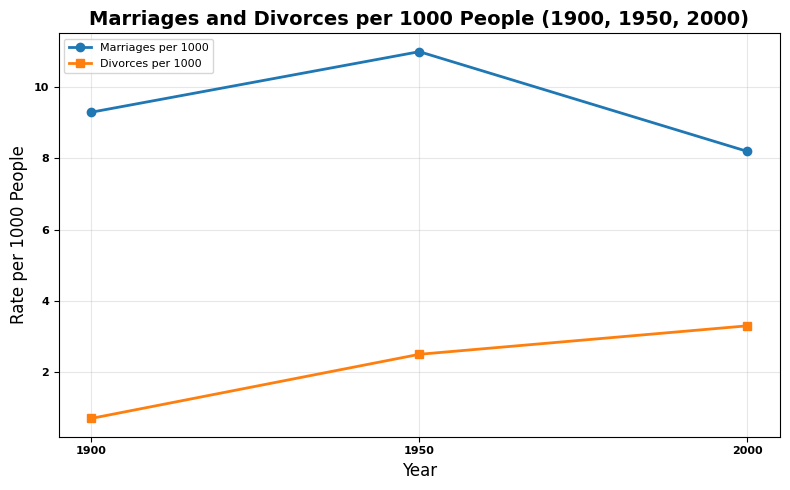

In [9]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "Data_for_problem_set_3/us-marriages-divorces-1867-2014 (1).csv"
data = pd.read_csv(file_path)

# Filter required years and fill missing values
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]
filtered_data = filtered_data.fillna(0)

# Plot the data
plt.figure(figsize=(8, 5))  # Increase figure size for clarity
plt.plot(filtered_data['Year'], filtered_data['Marriages_per_1000'], marker='o', color='#1f77b4', linewidth=2, label='Marriages per 1000')
plt.plot(filtered_data['Year'], filtered_data['Divorces_per_1000'], marker='s', color='#ff7f0e', linewidth=2, label='Divorces per 1000')

# Adding titles and labels
plt.title("Marriages and Divorces per 1000 People (1900, 1950, 2000)", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rate per 1000 People", fontsize=12)

# Adding grid and legend
plt.grid(alpha=0.3)
plt.legend(fontsize=8, loc='upper left')

# Adding ticks and formatting
plt.xticks(filtered_data['Year'], fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort <br>
the actors by their kill count and label each bar with the corresponding actor's name.<br>
Don't forget to label your axes

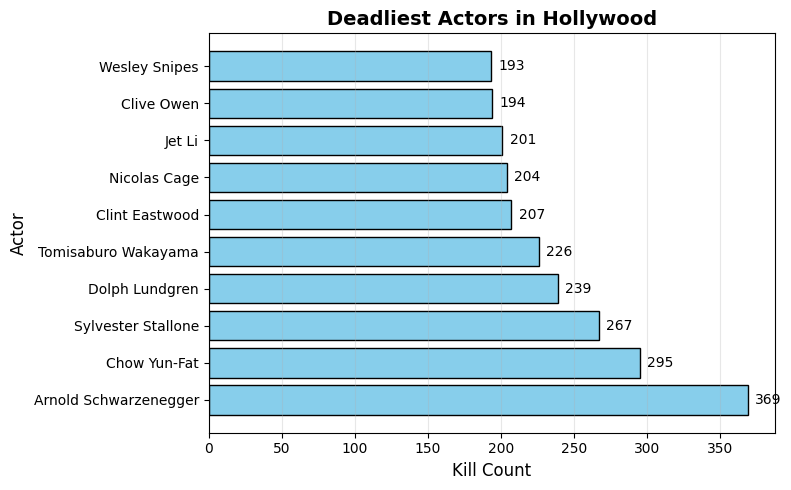

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = "Data_for_problem_set_3/actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort by kill count in descending order
data = data.sort_values(by="Count", ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(data['Actor'], data['Count'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Kill Count", fontsize=12)
plt.ylabel("Actor", fontsize=12)
plt.title("Deadliest Actors in Hollywood", fontsize=14, weight='bold')

# Add grid
plt.grid(axis='x', alpha=0.3)

# Add count labels on the bars
for index, value in enumerate(data['Count']):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

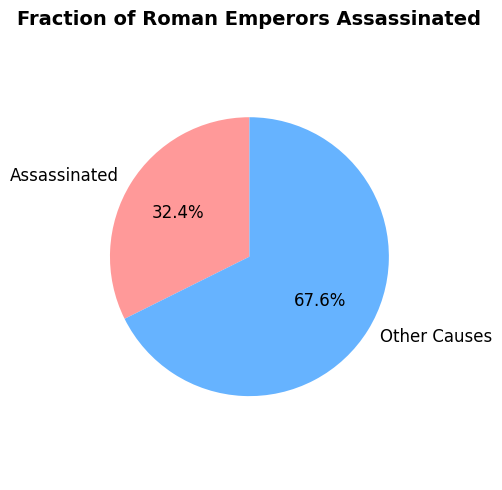

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
file_path = "Data_for_problem_set_3/roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Step 3: Count the causes of death, focusing on 'Assassinated'
cause_counts = data['Cause_of_Death'].value_counts()
assassinated_count = cause_counts.get('Assassinated', 0)

# Step 4: Create a pie chart for assassinated and other causes
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, len(data) - assassinated_count]
colors = ['#ff9999', '#66b3ff']

# Step 5: Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title("Fraction of Roman Emperors Assassinated", fontsize=14, weight='bold')
plt.axis('equal')  # Ensure the pie chart is a circle

# Show the plot
plt.tight_layout()
plt.show()


### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

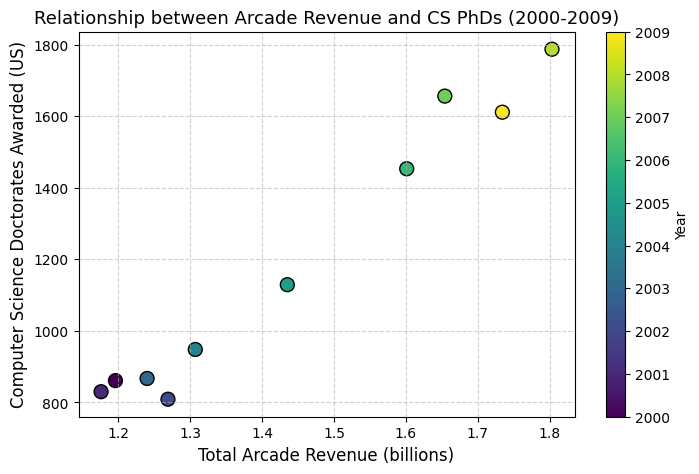

In [7]:
import matplotlib.pyplot as plt
file_path = "Data_for_problem_set_3/arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)
# Extract columns for the scatter plot
x = data['Total Arcade Revenue (billions)']
y = data['Computer Science Doctorates Awarded (US)']
years = data['Year']

# Create the scatter plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=years, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(scatter, label='Year')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)', fontsize=13)
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
